#Fitting Example

This notebook provides an example of how to use the functions in the module to fit a Naka-Rushton model to data

The Naka-Rushton model is of the form:

R(c) = Gr(c^n/(c^n + Gc^n)) + b

where:

R(c) = response as a function of stimulus contrast
c = stimulus contrast (input strength)
b = baseline
Gr = response gain, which determines how much the functions rises above baseline
Gc = contrast gain, which determines the horizontal position of the function
n = the exponent, which determines the slope of the function


In [2]:
import NakaRushton as nr
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
##Simulate data

Text(0.5, 1.0, 'Simulated Data')

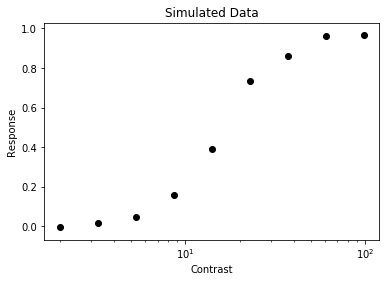

In [24]:
# simulate some data

# set parameters
Gr = 1.0; # response gain
b = 0.0; # baseline
Gc = 16; # contrast gain
n = 2.5; # exponent/slope
noise_sd = 0.02 # SD of noise added
n_contrasts = 9 # number of contrast levels
contrast_levels = np.exp(np.linspace(np.log(2),np.log(98),n_contrasts)) # log-spaced contrast values

data = nr.NakaRushton(contrast_levels,b,Gr,Gc,n) + np.random.normal(0,noise_sd,n_contrasts)

# plot simulated data
plt.figure()
plt.scatter(contrast_levels,data,color='k')
plt.xlabel('Contrast')
plt.ylabel('Response')
plt.xscale('log')
plt.title('Simulated Data')

In [ ]:
##Fit the Naka-Rushton function to data

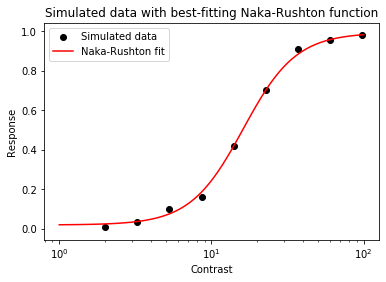

True b =  0.0, Estimated b = 0.02
True Gr =  1.0, Estimated Gr = 0.97
True Gc =  16, Estimated Gc = 16.18
True n =  2.5, Estimated n = 2.62


In [21]:
b_est, Gr_est, Gc_est, n_est, Rmax_est, C50_est = nr.fitNakaRushton(contrast_levels,data)

# generate N-R function using estimated model parameters
contrast_cont = np.exp(np.linspace(np.log(1),np.log(100),100)) 
nr_fit = nr.NakaRushton(contrast_cont,b_est,Gr_est,Gc_est,n)

# plot the data and model fit
plt.figure()
plt.scatter(contrast_levels,data,color='k',label='Simulated data')
plt.plot(contrast_cont,nr_fit,'r',label='Naka-Rushton fit')
handles, labels = plt.gca().get_legend_handles_labels()
plt.xlabel('Contrast')
plt.ylabel('Response')
plt.xscale('log')
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
plt.title('Simulated data with best-fitting Naka-Rushton function')
plt.show()

# print parameter estimates
print(f"True b =  {b}, Estimated b = {round(b_est,2)}")
print(f"True Gr =  {Gr}, Estimated Gr = {round(Gr_est,2)}")
print(f"True Gc =  {Gc}, Estimated Gc = {round(Gc_est,2)}")
print(f"True n =  {n}, Estimated n = {round(n_est,2)}")